In [12]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [13]:
import os
import sys
# for fitting:
# from https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/

In [14]:
os.getcwd()

'/home/wave/allpix2/allpixfiles/trapping_analysis/20220705'

In [15]:
import glob
glob.glob("*txt")

['20220705_mpv_15e14.txt',
 '20220705_charge_fraction_3e14.txt',
 '20220705_mpv_3e14.txt',
 '20220705_charge_fraction_10e14.txt',
 '20220705_mpv_10e14.txt',
 '20220705_charge_fraction_15e14.txt']

In [16]:
charge_fractions = {'3e14': {}, '10e14': {}, '15e14': {}}

for fluence in charge_fractions:
    charge_fractions[fluence] = {'bias': [], 'cce': [], 'stddev': []}
for fluence in charge_fractions.keys():
    print(fluence)
    filenames = glob.glob("*charge_fraction*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as cce_vs_bias:
        for line in cce_vs_bias:
            if 'x_axis' in line or line.startswith('#') or line.strip() == '': continue
            bias, cce, std = line.split()
            print(line)
            if 'None' in cce: continue
            charge_fractions[fluence]['bias'].append(float(bias))
            charge_fractions[fluence]['cce'].append(float(cce))
            charge_fractions[fluence]['stddev'].append(float(std))   

3e14
['20220705_charge_fraction_3e14.txt']
50    0.40078841    0.051487171

100    0.65105221    0.072758836

150    0.73608018    0.068465561

200    0.7749917    0.072464107

250    0.79613158    0.074660607

300    0.81159587    0.064693836

350    0.81786894    0.085093682

400    0.82601273    0.08599699

450    0.83430291    0.074069551

500    0.83391249    0.096161111

550    0.83932692    0.088153734

600    0.84310287    0.084931274

650    0.84668536    0.077257244

700    0.85034174    0.0083070177

750    0.85026897    0.083995241

800    0.85336898    0.071936611

850    0.85448104    0.075162033

900    0.85309027    0.091363881

10e14
['20220705_charge_fraction_10e14.txt']
50    0.16014595    0.023794515

100    0.28590882    0.03212603

150    0.52095255    0.05717163

200    0.6156119    0.053916224

250    0.6557762    0.062248336

300    0.68034561    0.069090737

350    0.69996278    0.057578252

400    0.71086555    0.067948772

450    0.71983889    0.073206677

5

3
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.40078841, 0.65105221, 0.73608018, 0.7749917, 0.79613158, 0.81159587, 0.81786894, 0.82601273, 0.83430291, 0.83391249, 0.83932692, 0.84310287, 0.84668536, 0.85034174, 0.85026897, 0.85336898, 0.85448104, 0.85309027]
[0.051487171, 0.072758836, 0.068465561, 0.072464107, 0.074660607, 0.064693836, 0.085093682, 0.08599699, 0.074069551, 0.096161111, 0.088153734, 0.084931274, 0.077257244, 0.0083070177, 0.083995241, 0.071936611, 0.075162033, 0.091363881]
Cluster charge efficiency $\Phi_{\mathrm{eq}}=$3$\cdot 10^{14}$/cm$^2$
10
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.16014595, 0.28590882, 0.52095255, 0.6156119, 0.6557762, 0.68034561, 0.69996278, 0.71086555, 0.71983889, 0.7272234, 0.73592279, 0.73724441, 0.74447955, 0.74764034, 0.74976363, 0.75432866, 0.75758601, 0.75634268]
[0.0237

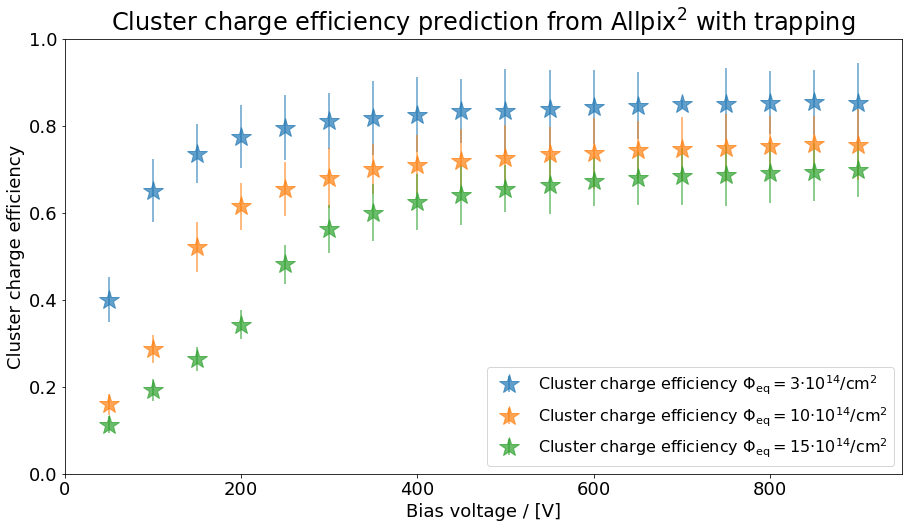

In [17]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in charge_fractions:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.errorbar(x, y, yerr = yerr, label=labelname, fmt=markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
    plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Cluster charge efficiency", fontsize = 18)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + filename[:filename.index('_')] + '_' + fluence + '_cce.png'), bbox_inches="tight")
plt.show()


3
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.40078841, 0.65105221, 0.73608018, 0.7749917, 0.79613158, 0.81159587, 0.81786894, 0.82601273, 0.83430291, 0.83391249, 0.83932692, 0.84310287, 0.84668536, 0.85034174, 0.85026897, 0.85336898, 0.85448104, 0.85309027]
[0.051487171, 0.072758836, 0.068465561, 0.072464107, 0.074660607, 0.064693836, 0.085093682, 0.08599699, 0.074069551, 0.096161111, 0.088153734, 0.084931274, 0.077257244, 0.0083070177, 0.083995241, 0.071936611, 0.075162033, 0.091363881]
Cluster charge efficiency $\Phi_{\mathrm{eq}}=$3$\cdot 10^{14}$/cm$^2$
10
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.16014595, 0.28590882, 0.52095255, 0.6156119, 0.6557762, 0.68034561, 0.69996278, 0.71086555, 0.71983889, 0.7272234, 0.73592279, 0.73724441, 0.74447955, 0.74764034, 0.74976363, 0.75432866, 0.75758601, 0.75634268]
[0.0237

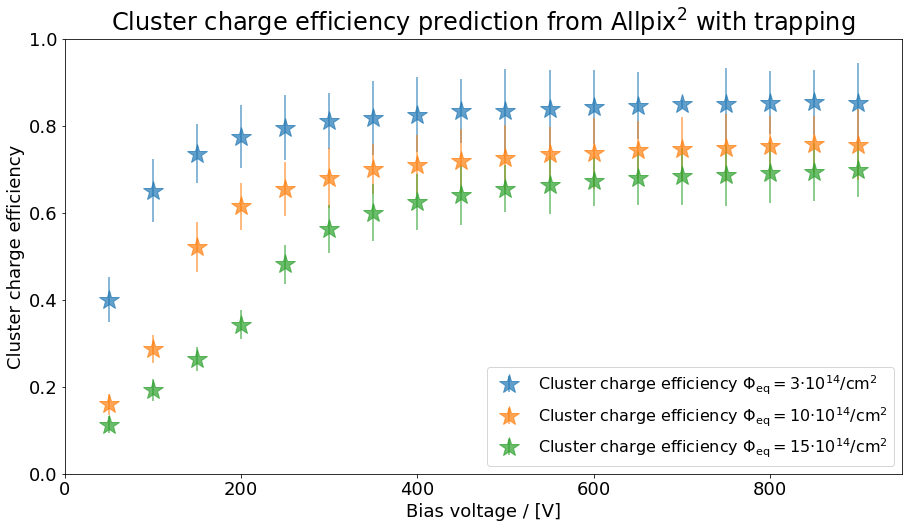

In [18]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in charge_fractions:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.errorbar(x, y, yerr = yerr, label=labelname, fmt=markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
plt.xlabel("Bias voltage / [V]", fontsize = 18)
plt.ylabel("Cluster charge efficiency", fontsize = 18)
plt.legend(fontsize = 16, loc='best')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + '_cce.png'), bbox_inches="tight")
plt.show()


In [19]:
cluster_charges = {'3e14': {}, '10e14': {}, '15e14': {}}


for fluence in cluster_charges:
    cluster_charges[fluence] = {'bias': [], 'mpv': [], 'err': []}
for fluence in cluster_charges.keys():
    print(fluence)
    filenames = glob.glob("*mpv*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as mpv_vs_bias:
        for line in mpv_vs_bias:
            if 'mpv' in line or line.startswith('#') or line.strip() == '': continue
            bias, mpv, err = line.split()
            print(line)
            if 'None' in mpv: continue
            cluster_charges[fluence]['bias'].append(float(bias.split('e')[0]))
            cluster_charges[fluence]['mpv'].append(float(mpv))
            cluster_charges[fluence]['err'].append(float(err))   

3e14
['20220705_mpv_3e14.txt']
50 5.87762 0.0318601

100 9.57666 0.0466644

150 10.942 0.0510573

200 11.4508 0.0561616

250 11.7335 0.0553315

300 11.9673 0.0587403

350 12.0291 0.0547343

400 12.0435 0.0500057

450 12.3216 0.0552303

500 12.4244 0.0591014

550 12.4565 0.0594153

600 12.3412 0.0527479

650 12.3843 0.0581502

700 14.1096 1.98193

750 12.6125 0.0576208

800 12.6218 0.0581458

850 12.6243 0.0592623

900 12.6096 0.0534811

10e14
['20220705_mpv_10e14.txt']
50 2.29762 0.0107937

100 4.19984 0.022329

150 7.67908 0.036021

200 9.0534 0.0397673

250 9.60242 0.0426456

300 9.9865 0.0470996

350 10.2811 0.0529208

400 10.4424 0.046135

450 10.5513 0.0471541

500 10.7565 0.050007

550 10.9063 0.052133

600 10.8561 0.0486849

650 11.028 0.0524599

700 11.1177 0.0506076

750 11.2312 0.0547832

800 11.2409 0.05185

850 11.2386 0.058288

900 11.1987 0.0548269

15e14
['20220705_mpv_15e14.txt']
50 1.65237 0.0087897

100 2.80478 0.0156107

150 3.87784 0.0186284

200 5.04673 0.0248793



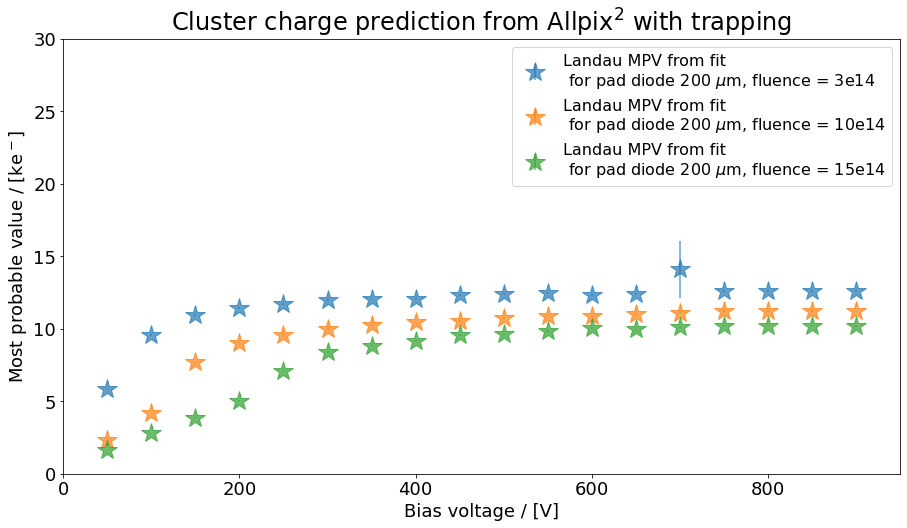

In [20]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
model = 'cmstracker'
voltage = -600
plot_file_name = ''
for fluence in cluster_charges:
    x = cluster_charges[fluence]['bias']
    y = cluster_charges[fluence]['mpv']
    yerr = cluster_charges[fluence]['err']
    plt.errorbar(x, y, yerr = yerr, label="Landau MPV from fit\n for pad diode " + str(thickness) + " $\mu$m, fluence = " + fluence, fmt=markerstyle, markersize=20, alpha=0.7)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    filenames = glob.glob("*" + model + "*dat")
    plt.title("Cluster charge prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Most probable value / [ke$^-$]", fontsize = 18)
    plot_file_name += os.path.basename(filename)[:-4] + '_'
    plt.ylim((0,30))
    plt.xlim((0,950))
plt.savefig(os.path.join(dirname, 'cluster_charge.png'), bbox_inches="tight")
plt.show()